

# Regresssion with scikit-learn using Soccer Dataset

### Prepared by: Shadab Sayeed






# Import Libraries


In [0]:
import sqlite3
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive




# Read Data from the Database into pandas



In [0]:
# Create your connection.
cnx = sqlite3.connect('/content/drive/My Drive/CSV files/database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [21]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [24]:
df.shape

(183978, 42)

In [22]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')



# Declaring the Columns we want to Use as Features



In [0]:
features = [
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Specifying the Prediction Target
<br><br></p>


In [0]:
target = ['overall_rating']

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Cleaning the Data<br><br></p>


In [0]:
df = df.dropna()

In [71]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [0]:
X = df[features]

In [0]:
y = df[target]

In [0]:
import seaborn as sns

In [0]:
import matplotlib.pyplot as plt


# plotting a heatmap to see the co-relation.

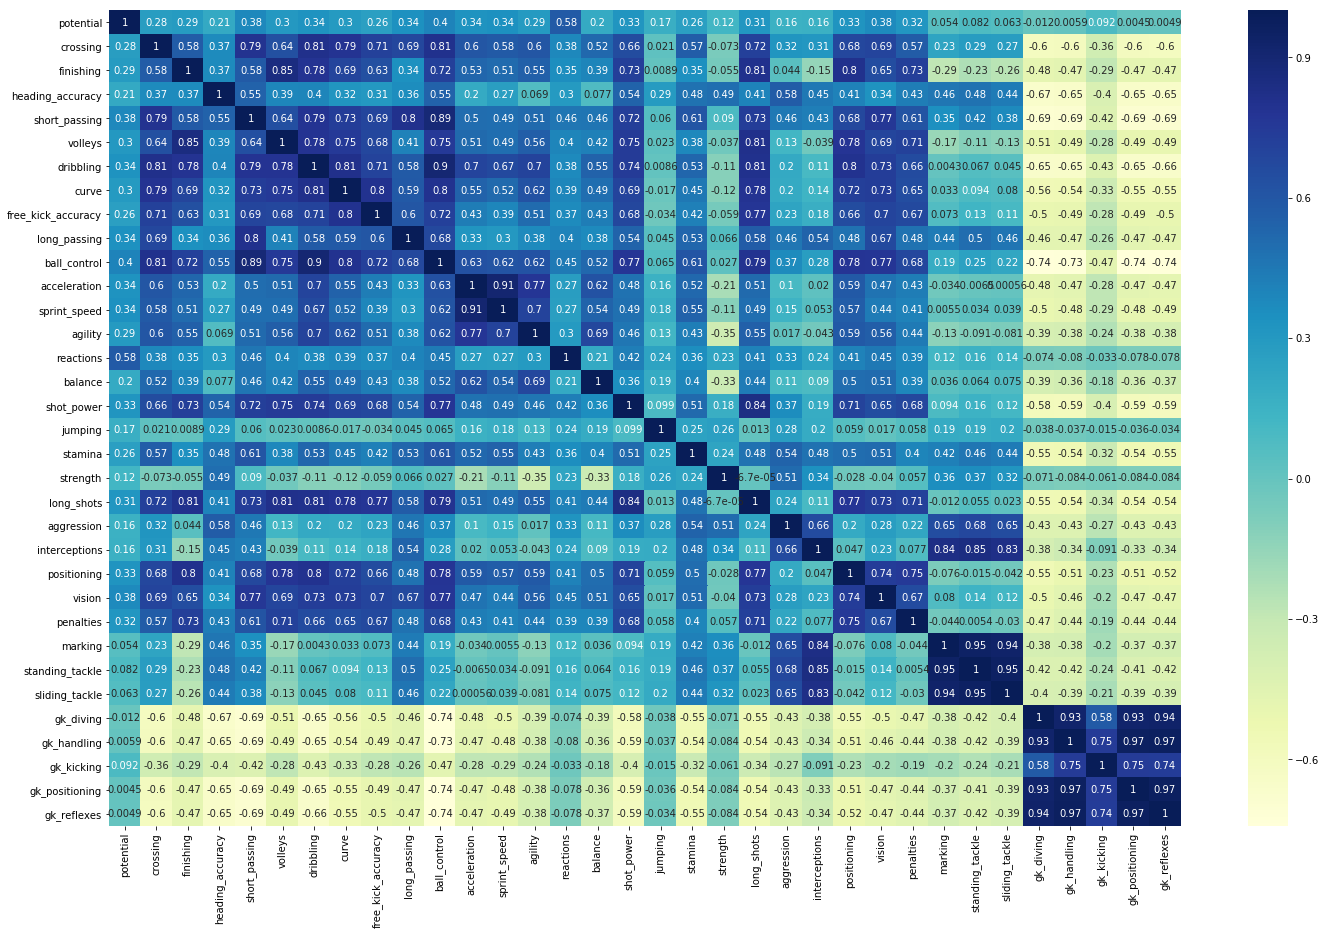

In [47]:
plt.figure(1,figsize=(24,15))
sns.heatmap(X.corr(),annot=True,cmap="YlGnBu")
plt.show()

Let us look at a typical row from our features: 

In [30]:
X.iloc[2]

potential             66.0
crossing              49.0
finishing             44.0
heading_accuracy      71.0
short_passing         61.0
volleys               44.0
dribbling             51.0
curve                 45.0
free_kick_accuracy    39.0
long_passing          64.0
ball_control          49.0
acceleration          60.0
sprint_speed          64.0
agility               59.0
reactions             47.0
balance               65.0
shot_power            55.0
jumping               58.0
stamina               54.0
strength              76.0
long_shots            35.0
aggression            63.0
interceptions         41.0
positioning           45.0
vision                54.0
penalties             48.0
marking               65.0
standing_tackle       66.0
sliding_tackle        69.0
gk_diving              6.0
gk_handling           11.0
gk_kicking            10.0
gk_positioning         8.0
gk_reflexes            8.0
Name: 2, dtype: float64

## Displaying  target values: 

In [31]:
y

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0
5,74.0
6,74.0
7,73.0
8,73.0
9,73.0



# Split the Dataset into Training and Test Datasets



In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)



# (1) Linear Regression: Fiting a model to the training set


In [33]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)



# Performing Prediction using Linear Regression Model



In [34]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[66.51284879],
       [79.77234615],
       [66.57371825],
       ...,
       [69.23780133],
       [64.58351696],
       [73.6881185 ]])

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

What is the mean of the expected target value in test set ?
<br><br></p>


In [35]:
y_test.describe()

,overall_rating
count,59517.000000
mean,68.635818
std,7.041297
min,33.000000
25%,64.000000
50%,69.000000
75%,73.000000
max,94.000000




# Evaluate Linear Regression Accuracy using Root Mean Square Error




In [0]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [37]:
print(RMSE)

2.8053030468552103




# Decision Tree Regressor: Fit a new regression model to the training set



In [38]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')



# Performing Prediction using Decision Tree Regressor



In [39]:
y_prediction = regressor.predict(X_test)
y_prediction

array([62.        , 84.        , 62.38666667, ..., 71.        ,
       62.        , 73.        ])

In [48]:
y_prediction.shape

(59517,)

In [0]:
y_prediction

In [51]:
y_test.shape

(59517, 1)

In [58]:
y_test.columns

Index(['overall_rating'], dtype='object')

In [50]:
X_test.shape

(59517, 34)

In [52]:
X_test.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
35543,74.0,20.0,20.0,20.0,22.0,7.0,20.0,10.0,9.0,58.0,20.0,45.0,44.0,31.0,55.0,44.0,23.0,78.0,55.0,68.0,20.0,49.0,48.0,43.0,26.0,69.0,20.0,20.0,9.0,64.0,63.0,58.0,62.0,74.0
28735,85.0,52.0,23.0,85.0,71.0,54.0,64.0,36.0,22.0,56.0,64.0,77.0,76.0,60.0,83.0,48.0,42.0,75.0,80.0,88.0,35.0,82.0,83.0,42.0,49.0,52.0,85.0,88.0,85.0,10.0,15.0,16.0,15.0,15.0
168029,75.0,64.0,49.0,53.0,66.0,37.0,67.0,61.0,41.0,61.0,67.0,72.0,70.0,70.0,56.0,75.0,56.0,59.0,72.0,66.0,53.0,64.0,57.0,53.0,65.0,51.0,51.0,54.0,46.0,9.0,14.0,9.0,12.0,12.0
138117,86.0,67.0,71.0,76.0,72.0,68.0,84.0,72.0,57.0,52.0,83.0,91.0,83.0,90.0,69.0,91.0,70.0,90.0,71.0,30.0,75.0,59.0,31.0,73.0,71.0,58.0,13.0,18.0,14.0,10.0,8.0,13.0,8.0,10.0
123316,76.0,31.0,23.0,71.0,61.0,29.0,44.0,31.0,24.0,52.0,62.0,63.0,54.0,46.0,54.0,59.0,33.0,73.0,58.0,64.0,42.0,54.0,56.0,22.0,43.0,47.0,69.0,69.0,66.0,15.0,6.0,7.0,13.0,10.0


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

For comparision: What is the mean of the expected target value in test set ?
<br><br></p>


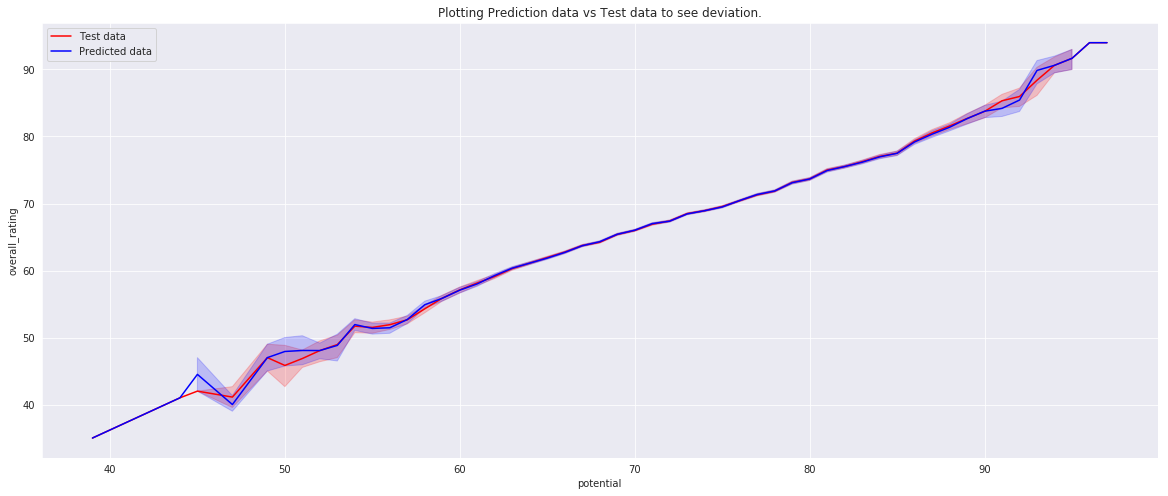

In [70]:
sns.set_style('darkgrid')
plt.figure(1,figsize=(20,8))
sns.lineplot(x=X_test.potential,y=y_test['overall_rating'],color='red',label='Test data')
sns.lineplot(x=X_test.potential,y=y_prediction,color='blue',label='Predicted data')
plt.title("Plotting Prediction data vs Test data to see deviation.")
plt.legend()
plt.show()

# As can been seen above prediction is fairly accurate.
# With a RMSE of less than < 1.5

In [40]:
y_test.describe()

,overall_rating
count,59517.000000
mean,68.635818
std,7.041297
min,33.000000
25%,64.000000
50%,69.000000
75%,73.000000
max,94.000000




# Evaluate Decision Tree Regression Accuracy using Root Mean Square Error




In [0]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [42]:
print(RMSE)

1.4564268783071237
